# DISCRETIZAÇÃO DO TBP

#### IMPORTAÇÃO DAS BIBLIOTECAS

In [13]:
import numpy as np
from Classes.Discretizacao import Discretizacao as disc
from Classes.Planeta import Planeta
from Classes.Splines import CubicSpline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go
from plotly.subplots import make_subplots  
from IPython.display import HTML
import polars as pl
%matplotlib inline


#### CONDIÇÕES INICIAIS E LOOP DA DISCRETIZAÇÃO PARA MÚLTIPLOS "N"

In [14]:

#massa padrao de todos os planetas
labels = ['Corpo 1', 'Corpo 2', 'Corpo 3']
T = 1
discretizacao = disc()
np.set_printoptions(threshold=np.inf)
dfs = [] #LISTA COM TODAS OS DATAFRAMES
schema = ['t', 'pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
dados = np.zeros((1, 8)) #UTILIZADO PARA GERAR TABELA DE CONVERGÊNCIA
for i in range(2, 10):  # Adjust the range to iterate up to n+1
    n = 2**i
    h = T/n
    pos1, pos2, pos3, t = discretizacao.converte(n, True)
    t = np.squeeze(t)
    y = np.hstack((pos1[-1], pos2[-1], pos3[-1]))
    dado_novo = np.hstack((n, h, y))
    dados = np.vstack((dados, dado_novo))
    #GERANDO UMA LISTA COM TODOS OS DATAFRAMES (TABELAS) PARA CADA N
    df = pl.from_numpy(np.hstack([t.reshape(-1,1), pos1, pos2, pos3]), schema = schema)
    dfs.append(df)
    
    
    
    
    

[-0.8118834   0.33452409  1.05272135 -0.12942917 -0.24083794 -0.20509492
  0.80953663  0.26183189  0.21055129  0.4656567  -1.02008792 -0.72748859]
[-0.5703783   0.35055886  1.08068423 -0.01266289 -0.51030593 -0.33789597
  1.08537321 -0.1756152   0.01918682  0.46713705 -1.10456003 -0.29152185]
[-0.29795461  0.24233199  1.06283305  0.10414298 -0.76487844 -0.34647497
  1.05004053 -0.66057118 -0.16567641  0.46679796 -0.88436412  0.19377322]
[-0.05224979  0.04570164  0.99345231  0.21922407 -0.94120252 -0.26492571
  0.93301664 -0.86228453 -0.40292663  0.44596498 -0.53009001  0.41631955]
(5,) (2,) (2,) (2,)
shape: (5, 7)
┌──────┬───────────┬──────────┬──────────┬───────────┬───────────┬───────────┐
│ t    ┆ pos1x     ┆ pos2x    ┆ pos3x    ┆ pos1y     ┆ pos2y     ┆ pos3y     │
│ ---  ┆ ---       ┆ ---      ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ f64  ┆ f64       ┆ f64      ┆ f64      ┆ f64       ┆ f64       ┆ f64       │
╞══════╪═══════════╪══════════╪══════════╪═══════════╪════════

### TABELAS

##### DADOS OBTIDOS

In [15]:
cols = ['pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
df = pl.from_numpy(dados[1:], schema = ['n', 'h'] + cols)
df

shape: (8, 8)
┌───────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬───────────┐
│ n     ┆ h         ┆ pos1x     ┆ pos2x    ┆ pos3x    ┆ pos1y    ┆ pos2y     ┆ pos3y     │
│ ---   ┆ ---       ┆ ---       ┆ ---      ┆ ---      ┆ ---      ┆ ---       ┆ ---       │
│ f64   ┆ f64       ┆ f64       ┆ f64      ┆ f64      ┆ f64      ┆ f64       ┆ f64       │
╞═══════╪═══════════╪═══════════╪══════════╪══════════╪══════════╪═══════════╪═══════════╡
│ 4.0   ┆ 0.25      ┆ -0.05225  ┆ 0.045702 ┆ 0.993452 ┆ 0.219224 ┆ -0.941203 ┆ -0.264926 │
│ 8.0   ┆ 0.125     ┆ -0.05081  ┆ 0.046749 ┆ 0.993572 ┆ 0.219207 ┆ -0.942762 ┆ -0.265955 │
│ 16.0  ┆ 0.0625    ┆ -0.050738 ┆ 0.046853 ┆ 0.993582 ┆ 0.219205 ┆ -0.942844 ┆ -0.266059 │
│ 32.0  ┆ 0.03125   ┆ -0.050734 ┆ 0.046861 ┆ 0.993583 ┆ 0.219205 ┆ -0.942848 ┆ -0.266066 │
│ 64.0  ┆ 0.015625  ┆ -0.050734 ┆ 0.046861 ┆ 0.993583 ┆ 0.219205 ┆ -0.942849 ┆ -0.266066 │
│ 128.0 ┆ 0.0078125 ┆ -0.050734 ┆ 0.046861 ┆ 0.993583 ┆ 0.219205 ┆ -0.942849 ┆ -0.266066 │
│ 256.0 ┆ 0.003906  ┆ -0.050734 ┆ 0.046861 ┆ 0.993583 ┆ 0.219205 ┆ -0.942849 ┆ -0.266066 │
│ 512.0 ┆ 0.001953  ┆ -0.050734 ┆ 0.046861 ┆ 0.993583 ┆ 0.219205 ┆ -0.942849 ┆ -0.266066 │
└───────┴───────────┴───────────┴──────────┴──────────┴──────────┴───────────┴───────────┘

##### TABELA DE CONVERGÊNCIA

In [16]:
cols = ['pos1x', 'pos2x', 'pos3x', 'pos1y', 'pos2y', 'pos3y']
erros = np.log2(np.absolute((df[cols][0:-2] - df[cols][1:-1])/ 
        (df[cols][1:-1] - df[cols][2:])))
# df_np = df[cols].to_numpy()
# df_vetorial = pl.from_numpy((df_np[:,:3]**2 + df_np[:,3:]**2)**(0.5), schema = ['pos1(t)', 'pos2(t)', 'pos3(t)'])
# cols = ['pos1(t)', 'pos2(t)', 'pos3(t)']
# erros_vetorial = ((df_vetorial[cols][0:-2] - df_vetorial[cols][1:-1]) / 
#         (df_vetorial[cols][1:-1] - df_vetorial[cols][2:]))
pl.from_numpy(erros)

shape: (6, 6)
┌──────────┬──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 ┆ column_5 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╪══════════╡
│ 4.316795 ┆ 3.32193  ┆ 3.551371 ┆ 3.433318 ┆ 4.24135  ┆ 3.320121 │
│ 4.354565 ┆ 3.844139 ┆ 3.759646 ┆ 3.754708 ┆ 4.266204 ┆ 3.84558  │
│ 4.262108 ┆ 3.95776  ┆ 3.879933 ┆ 3.877308 ┆ 4.18716  ┆ 3.959136 │
│ 4.162882 ┆ 3.987867 ┆ 3.940071 ┆ 3.937439 ┆ 4.1114   ┆ 3.98877  │
│ 4.091724 ┆ 3.996225 ┆ 3.970074 ┆ 3.968315 ┆ 4.060963 ┆ 3.996739 │
│ 4.048806 ┆ 3.998698 ┆ 3.985032 ┆ 3.983824 ┆ 4.031944 ┆ 3.998968 │
└──────────┴──────────┴──────────┴──────────┴──────────┴──────────┘

#### ANIMAÇÃO DOS 3 CORPOS (no Jupyter Notebook não funciona, precisa rodar o main.py)

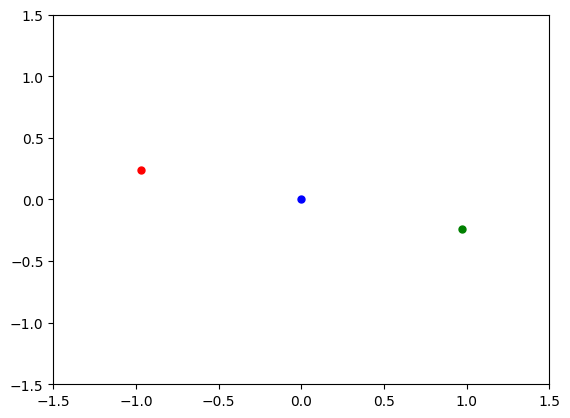

In [17]:
fig, ax = plt.subplots()

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Create empty lines for the plot
line1, = ax.plot([], [], 'r-', lw=2)
line2, = ax.plot([], [], 'g-', lw=2)
line3, = ax.plot([], [], 'b-', lw=2)

# Create empty scatter plots for the balls
ball1, = ax.plot([], [], 'ro', markersize=5)
ball2, = ax.plot([], [], 'go', markersize=5)
ball3, = ax.plot([], [], 'bo', markersize=5)

# Animation function
def update(frame):
    line1.set_data(pos1[:frame, 0], pos1[:frame, 1])
    line2.set_data(pos2[:frame, 0], pos2[:frame, 1])
    line3.set_data(pos3[:frame, 0], pos3[:frame, 1])

# Create empty scatter plots for the balls
ball1, = ax.plot([], [], 'ro', markersize=5)
ball2, = ax.plot([], [], 'go', markersize=5)
ball3, = ax.plot([], [], 'bo', markersize=5)

# Animation function
def update(frame):
    line1.set_data(pos1[:frame, 0], pos1[:frame, 1])
    line2.set_data(pos2[:frame, 0], pos2[:frame, 1])
    line3.set_data(pos3[:frame, 0], pos3[:frame, 1])
    ball1.set_data([pos1[frame, 0]], [pos1[frame, 1]])
    ball2.set_data([pos2[frame, 0]], [pos2[frame, 1]])
    ball3.set_data([pos3[frame, 0]], [pos3[frame, 1]])

    return line1, line2, line3, ball1, ball2, ball3

# Create the animation
ani = FuncAnimation(fig, update, frames=len(pos1), interval=1, blit=True)
plt.show()


### GERAÇÃO DE MÚLTIPLOS GRÁFICOS

##### GERANDO UM GRÁFICO PARA CADA VARIÁVEL

In [18]:
for i in range(len(schema[1:])):
    fig = go.Figure()
    var = schema[i+1]
    for n in range(len(dfs)):
        fig.add_trace(go.Scatter(x = dfs[n]['t'], y = dfs[n][var], mode = 'lines', name ="<b>" + "n = " + str(2**(n+7)) + '</b>'))
    fig.update_layout(title = "<b> Corpo {0} ({1}) vs t </b>".format(1 + i//2, "x" if i%2 == 0 else "y"), xaxis_title = '<b>t</b>', yaxis_title ="<b>" +"x" if i%2 == 0 else "y" + "</b>", width = 700)
    fig.show()
    

        

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### SPLINE CÚBICO PARA 1 CORPO

In [ ]:

#SPLINE CUBICO
pos_stack = np.array( [pos1, pos2, pos3] )
t = np.linspace(0, T, len(pos1[:,0]))
t_plot = np.arange(0, T,  T/(20*n))
csx = np.array(list(map( lambda pos: CubicSpline(t, pos[:, 0]), pos_stack)))
csy = np.array(list(map( lambda pos: CubicSpline(t, pos[:, 1]), pos_stack)))

# Create figure
fig = go.Figure()

# Add real values
fig.add_trace(go.Scatter(x=pos1[:, 0], y=pos1[:, 1], mode='lines', name='Runge Kutta'))
# fig.add_trace(go.Scatter(x=pos2[:, 0], y=pos2[:, 1], mode='lines', name='Real Pos2'))
# fig.add_trace(go.Scatter(x=pos3[:, 0], y=pos3[:, 1], mode='lines', name='Real Pos3'))

# # Add spline predictions
# for i in range(len(pos_stack)):
#     fig.add_trace(go.Scatter(x=csx[i](t_plot), y=csy[i](t_plot), mode='lines', name=f'Spline Pos{i+1}'))
fig.add_trace(go.Scatter(x=csx[0](t_plot)[0:], y=csy[0](t_plot)[0:], mode='lines', name=f'Spline Cúbico'))

# Set layout
fig.update_layout(
    title='Movimento dos três corpos',
    xaxis_title='X (m)',
    yaxis_title='Y (m)',
    legend_title='Legend',
    showlegend=True,
    width = 600
)

fig.show()




4097 4097 4097 4097 4096 4097
4095 4095
4097 4097 4097 4097 4096 4097
4095 4095
4097 4097 4097 4097 4096 4097
4095 4095
4097 4097 4097 4097 4096 4097
4095 4095
4097 4097 4097 4097 4096 4097
4095 4095
4097 4097 4097 4097 4096 4097
4095 4095
